In [56]:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

¿Cuál sera la prima (coste)?

In [57]:
df.shape

(1338, 7)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tenemos 1338 filas y 7 columnas, todas completas sin valores nulos

In [59]:
!pip install tableone

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [60]:
def is_binary(df_, nums):
    df = df_.copy()
    variables = []
    for var in nums:
        flag = True
        unique = df_[var].unique()
        for value in unique:
            if value not in [0, 1, np.nan, 0.0, 1.0]:
                flag = False
        if flag == True:
            variables.append(var)
    return variables

def breakdown_vars(df, off_binary=False):
    """
    This function allow us categorize accodign to numerical or not
    """
    binaries = is_binary(df, df.columns)
    categorial = []
    nonormal = []
    normal = []
    for t in df.columns:
        if off_binary == False:
          if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category') and  t not in binaries:
            categorial.append(t)
        else:
           if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category'):
            categorial.append(t)
        if (df[t].dtypes=="int64" or df[t].dtypes=="float64") and t not in binaries:
                n,p = stats.shapiro(df[t])
                if p<0.05:
                    nonormal.append(t)
                else:
                    normal.append(t)
    if off_binary == False:
      return categorial, binaries, nonormal, normal
    else:
      return categorial, nonormal, normal

In [61]:
cat, nonormal ,  normal = breakdown_vars(df,  off_binary=True)

In [62]:
print(cat)
print(nonormal)
print(normal)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']
[]


In [63]:
from tableone  import TableOne, load_dataset
from scipy import stats
mytable = TableOne(df,categorical=cat, nonnormal=nonormal, groupby='sex', pval=True)

In [64]:
print(mytable)

                                   Grouped by sex                                                                                   
                                          Missing                  Overall                   female                     male P-Value
n                                                                     1338                      662                      676        
age, median [Q1,Q3]                             0         39.0 [27.0,51.0]         40.0 [27.0,51.8]         39.0 [26.0,51.0]   0.447
sex, n (%)               female                                 662 (49.5)              662 (100.0)                           <0.001
                         male                                   676 (50.5)                                       676 (100.0)        
bmi, median [Q1,Q3]                             0         30.4 [26.3,34.7]         30.1 [26.1,34.3]         30.7 [26.4,35.0]   0.101
children, median [Q1,Q3]                        0            1.0 [0.0

In [65]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['sex']]).toarray())  
df.drop(columns=['sex'],inplace=True)
ohe_df.columns = ohe.get_feature_names_out(['sex'])
df=df.join(ohe_df) 

Aplicamos OneHotEncoder para convertir las variables categoricas a "numericas", en este primar caso pasamos el sexo de "f" o "m" a 0 si es mujer o 1 si es hombre

In [66]:
df

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0.0
1,18,33.770,1,no,southeast,1725.55230,1.0
2,28,33.000,3,no,southeast,4449.46200,1.0
3,33,22.705,0,no,northwest,21984.47061,1.0
4,32,28.880,0,no,northwest,3866.85520,1.0
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1.0
1334,18,31.920,0,no,northeast,2205.98080,0.0
1335,18,36.850,0,no,southeast,1629.83350,0.0
1336,21,25.800,0,no,southwest,2007.94500,0.0


In [67]:
ohe_df = pd.DataFrame(ohe.fit_transform(df[['smoker']]).toarray())  
df.drop(columns=['smoker'],inplace=True)
ohe_df.columns = ohe.get_feature_names_out(['smoker'])
df=df.join(ohe_df) 

Mismo caso cambiamos los smokers de "yes" o "no" a "1" o "0"

In [68]:
df

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0.0,1.0
1,18,33.770,1,southeast,1725.55230,1.0,0.0
2,28,33.000,3,southeast,4449.46200,1.0,0.0
3,33,22.705,0,northwest,21984.47061,1.0,0.0
4,32,28.880,0,northwest,3866.85520,1.0,0.0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1.0,0.0
1334,18,31.920,0,northeast,2205.98080,0.0,0.0
1335,18,36.850,0,southeast,1629.83350,0.0,0.0
1336,21,25.800,0,southwest,2007.94500,0.0,0.0


In [69]:
ohe_df = pd.DataFrame(ohe.fit_transform(df[['region']]).toarray())  
df.drop(columns=['region'],inplace=True)
ohe_df.columns = ohe.get_feature_names_out(['region'])
df=df.join(ohe_df) 

In [70]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


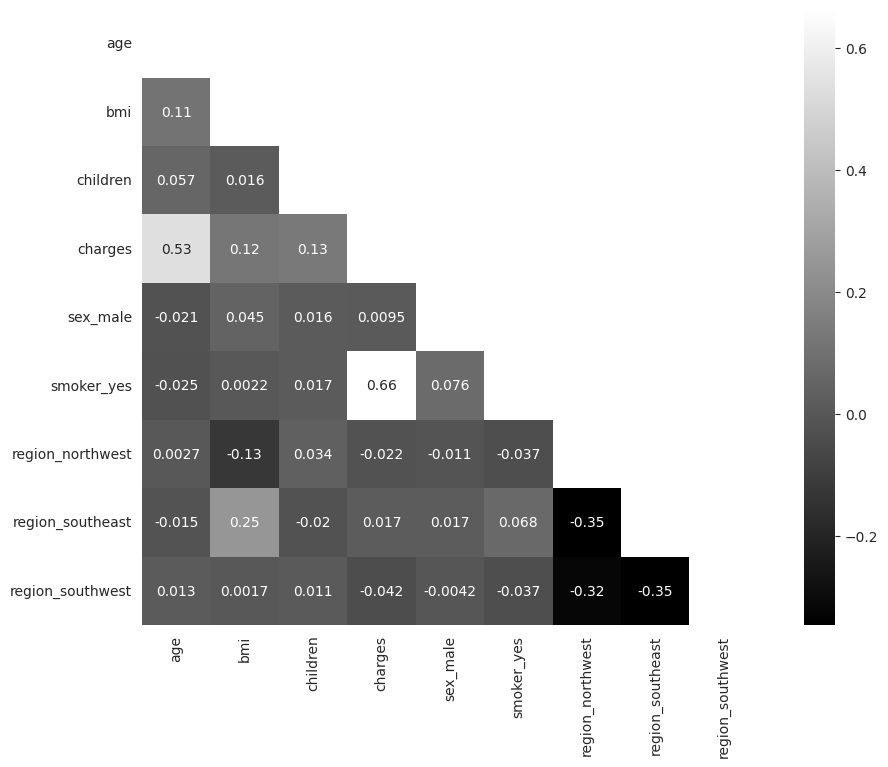

In [71]:
corrMatrix = df.corr(method='spearman')
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="gray")